# <center> Man vs Wild: Mushroom Edition </center>

Considering the success of Bear Grylls' famous survival reality show and the number of reruns, it would not be a surprise if there was another spinoff of the program, focused on how mushrooms found in the wild can be utilised, because as the fearless survivalist states, you should not pass an opportunity on a potentially protein-containing food source.
Therefore, for the adrenaline seekers, planning to go on expeditions where the only potential food resource is mushrooms, this is the ultimate notebook assisting your survival in the wild. Because as amazing mushrooms can look, they can be equally dangerous. The following notebook explores a mushroom dataset obtained in <a href="https://www.kaggle.com/uciml/mushroom-classification?select=mushrooms.csv" target="_blank">Kaggle</a> and attempts to develop a model that allows to distinguish between edible and poisonous mushrooms, based on specific features. 

![Mushroom photo](https://images.unsplash.com/photo-1505820013142-f86a3439c5b2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80)

<center> Photo by <a href="https://unsplash.com/@flovayn?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Florian van Duyn</a> on <a href="https://unsplash.com/s/photos/mushrooms?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
</center>

The aims of the workbook are the following:
- Identify which model is most robust for accurately predicting whether a mushroom is poisonous

- Identify which features are the most important in achieving this and reduce the required number of features for the model to function properly

- Productionise the findings by making a user-friendly function

Tables of content:

(1) Clean the data and EDA

(2) Modelling

(3) Feature reduction

(4) Summarise findings

Firstly, we should import all the necessary packages to be used.

In [1]:
#basic tools
import numpy as np
import pandas as pd
import math

#visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns

#modelling tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

#tools for assessing the results
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## (1) Data Cleaning

We import the dataset.

In [2]:
mushrooms=pd.read_csv('mushrooms.csv')

In [3]:
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


By making a summary of the dataset using the `info()` method, we observe that it is comprised in total of 22 features mainly describing the appearance of the mushrooms and the class column which is the target variable, all being listed below. Additionally, there are in total 8123 observations in the dataset which is a satisfactory amount for creating a model. There are no nulls in any of the columns, which indicates that the cleaning process is not going to be particularly challenging.

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The features contained in the dataset are all categorical.

In [5]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

By checking the unique variables of each feature we see that there is an unexpected entry of ? in the stalk-root column.

In [6]:
for col in list(mushrooms.columns):
    print(col,mushrooms[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Unfortunately, it appears in 2480 observations which is a significant portion of the data (31%), so we cannot drop the corresponding rows. Therefore when cleaning the data we will be replacing the ? with the string 'Unknown'.

In [7]:
mushrooms[mushrooms['stalk-root']=='?'].shape

(2480, 23)

As expected our target variable is comprised of 2 variables:
- e for edible
- p for poisonous

The poisonous data form 48% of the dataset meaning that there is not a significant class imbalance within the data. We can counteract for this small difference by using the `stratify` argument when we split the data later on.

In [8]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Having taken an initial look to our dataset we can now move to the EDA part where we can visualise and get a better understanding of the features. Since all the features are categorical we can use countplots.

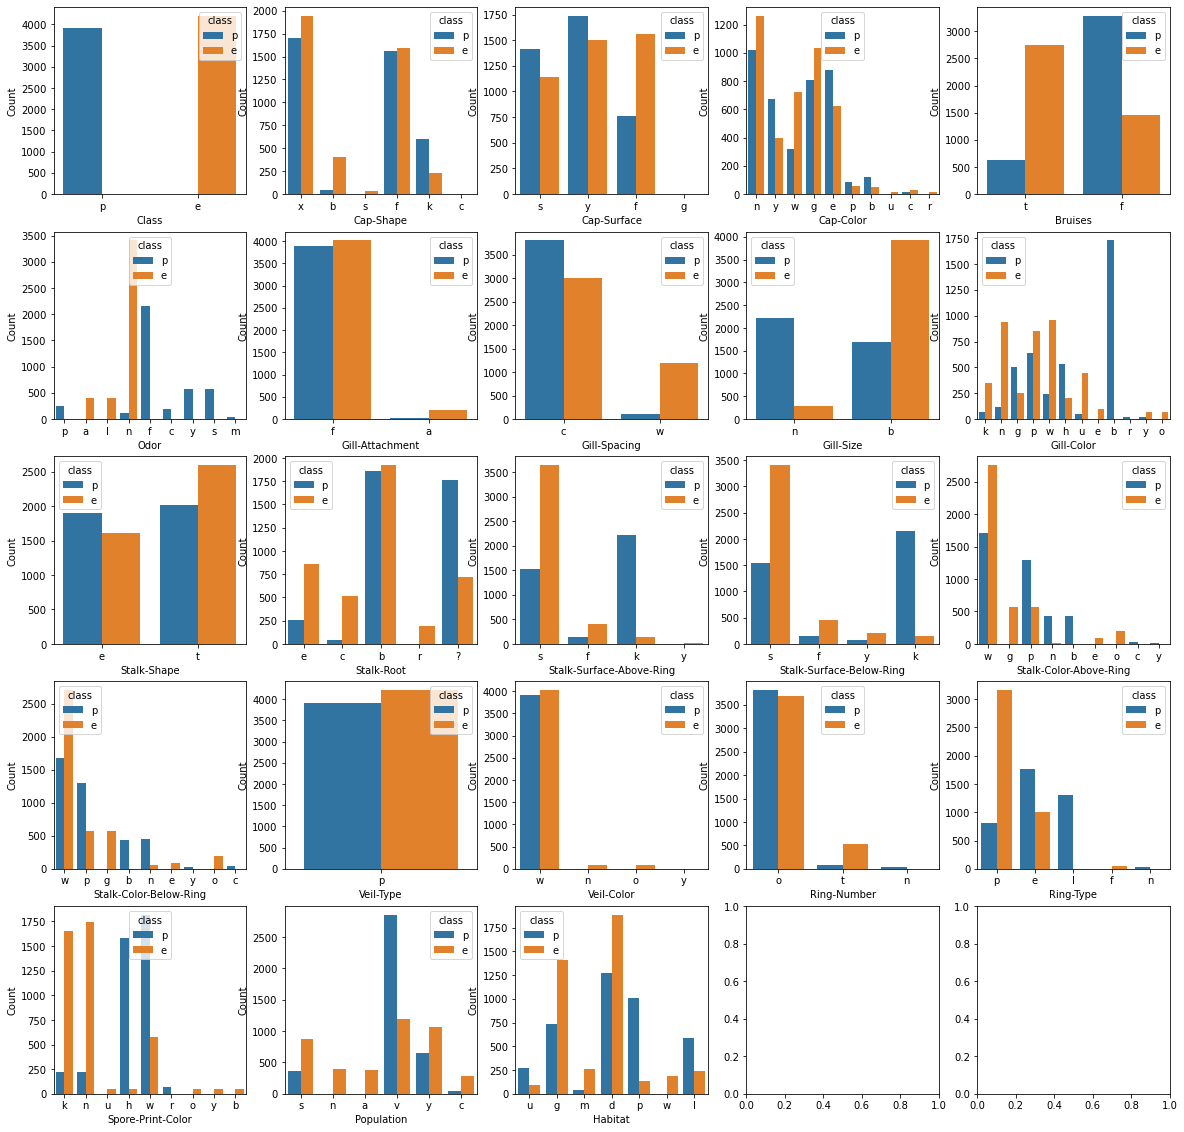

In [9]:
#plotting everything on a single graph
cols=list(mushrooms.columns)
no_cols=len(cols)
side=math.ceil(np.sqrt(no_cols))
fg, ax = plt.subplots(side,side,figsize=[20,20])
for c in range(len(cols)):
    sns.countplot(data=mushrooms, x=cols[c], hue='class', ax=ax[int(c//side), c%side])
    ax[int(c//side),c%side].set_xlabel(f'{cols[c].title()}')
    ax[int(c//side),c%side].set_ylabel('Count')

In the graphs above the blue bars represent poisonous, whereas the orange shows edible mushrooms. From these graphs we can make an initial prediction on which features are going to have the most impact on the model, by looking at the difference between the edible and poisonous count of a particular variable. The higher this difference is, the more likely it is going to assist the model in identifying if the input characteristics correspond to a poisonous mushroom. Based on this assumption we can expect a significant contribution from:

- Bruises

- Odor

- Gill-size

- Gill-color

- Stalk surface above and below the ring

- Spore print color

Another major pattern seen from the graphs, is the fact that there exist variables with a count of lower than 100. Preferably these should be removed as they might cause issues when splitting the data by randomly excluding one of these variables from either the train or test dataset. 

In [10]:
for col in list(mushrooms.columns):
    unique = list(mushrooms[col].unique())
    for u in unique:
        if mushrooms[mushrooms[col] == u].shape[0]<100:
            mushrooms = mushrooms[mushrooms[col] != u]

In [11]:
mushrooms.shape

(7424, 23)

Now the new number of observations is 7424, which is still satisfactory to model the data. 

## (2) Modelling

To make our approach more programmatic we first introduce some essential functions that are going to be used repeatedly within the notebook:

- clean_df takes as an argument the original dataframe and performs all the necessary cleaning discussed in part (1). This includes:
    
    1) Replacing the ? with 'Unknown' in the stalk root variable
    
    2) Replacing - with _ for feature names
    
    3) Replacing the class values with 1 for p since it is our positive label and e with 0
    
    4) Removing any variables with a count of less than 100

In [12]:
def clean_df(df):
    
    columns_d={}
    for col in list(df.columns):
        columns_d[col]=col.replace('-','_')
    df.rename(columns=columns_d,inplace=True)
    df.loc[df['stalk_root']=='?','stalk_root']='Unknown'
    df['class'] = df['class'].astype(str).apply((lambda x: 1 if x=='p' else 0))
    
    for col in list(df.columns):
        unique = list(df[col].unique())
        for u in unique:
            if df[df[col] == u].shape[0]<100:
                df = df[df[col] != u]
    
    return df

- feature_eng will feature engineer our data. Since all of the features are categoral we need to One Hot Encode. However, for the particular models to be used we must not drop any of the columns.

In [13]:
def feature_eng(df,dummies):
    
    df=pd.get_dummies(df,columns=dummies,prefix=dummies,sparse=True)
    return df

- run_model will run the specified model and return the available target data and the respective predictions. It also has the option of selecting any particular columns to be included in the model after OHE by specifying these columns using the columns_s argument and setting after_OHE to True. It will become evident in part (3) why was this option is needed.

In [14]:
def run_model(model, df, columns_s, premodel=False, after_OHE = False):

    #columns contains all features
    columns = [f for f in list(mushrooms.columns) if f!='class'] 
    
    X = mushrooms[columns]
    y = mushrooms['class']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105, stratify=y)
    #feature engineer the data
    X_train = feature_eng(X_train,list(X_train.columns))
    X_test = feature_eng(X_test,list(X_test.columns))
    #this option allows to select specific columns after OHE is performed
    if after_OHE == True:
        X_train = X_train[columns_s]
        X_test = X_test[columns_s]    
    #this option allows to observe the data just after OHE without any modelling
    if premodel==True:
        return X_train, X_test, y_train, y_test
    
    #exception is raised because when using the SVM model it requires as input an array rather than dataframe
    try:
        model.fit(X_train, y_train)
    except TypeError:
        model.fit(np.array(X_train), np.array(y_train))
        
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return y_train, y_pred_train, y_test, y_pred_test,model

- apr allows us to obtain important statistics about the data to assess the quality of the model. It takes as an input the target data and their predictions and returns the accuracy, recall, precision and f1. 

In [15]:
def apr(y_real, y_pred, prnt=False):
    
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    #this gives the option to the user to print the statistics
    if prnt==True:
        print(f"Accuracy:{accuracy}")
        print(f"Precision:{precision}")
        print(f"Recall:{recall}")
        print(f"F1:{f1}")
    return accuracy, recall, precision, f1

- save_results saves the statistics of the model in a specified dataframe.

In [16]:
def save_results(results, df, model):
    
    stats_train=apr(results[0],results[1])
    stats_test=apr(results[2],results[3])
    df.loc[len(df)]=model,(stats_train[0],stats_test[0]),(stats_train[1],stats_test[1]),(stats_train[2],stats_test[2]),(stats_train[3],stats_test[3])

- produce_confusion returns the confusion matrix which is an important visualising tool for class predictive modelling.

In [17]:
def produce_confusion(y, y_pred, negative_label,positive_label):

    cm = metrics.confusion_matrix(y, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Real labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label])

In [18]:
colors = ['#163e67', '#67163d', '#3e6716']
sns.color_palette(colors)
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))
sns.set(font='Franklin Gothic Medium', font_scale=1.5)

Before starting to model our data we manually prepare the data (feature engineer, train-test-split) to verify that the process runs as expected. 

In [19]:
mushrooms = pd.read_csv('mushrooms.csv')

In [20]:
mushrooms = clean_df(mushrooms)

In [21]:
columns = [f for f in list(mushrooms.columns) if f!='class'] 
X = mushrooms[columns]
y = mushrooms['class'] 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=105, stratify = y)

In [23]:
X_train = feature_eng(X_train, columns)
X_test = feature_eng(X_test, columns)

Below we can verify that the splitting is performed as expected and by removing variables with a very small count we have ensured that the number of features in the train and test data after OHE is the same as required.

In [24]:
X_train.shape[1] == X_test.shape[1]

True

Since the target variable of the project is categorical, it means that we need to use either class predictive models or supervised clustering. Therefore, the models that will be tested are:

a) Support Vector Machines 

b) Random Forest

c) K Nearest Neighbours

d) Decision Trees

### a) Support Vector Machines (SVM)

For SVM, Random Forests and Decision Trees we are going to be using GridSearchCV that will allow us to try a variety of hyperparameters and choose the ideal. It should be noted that for this particular project achieving a high recall is much more important compared to other statistics. Based on the definition of recall where,

<center>$ Recall = \frac{True Positives}{(True Positives + False Negatives)} $</center>

the lower the recall score is, the higher the number of False Negative predictions of the model, which corresponds to wrongly predicting that a mushroom is edible. This is a very crucial error, with more serious repercussions compared to making False Positive predictions, since it could lead to accidentally ingesting a poisonous mushroom. Therefore, we can using the `scoring` argument, to achieve the highest recall possible.

In [25]:
grid_s = GridSearchCV(estimator = SVC(), 
                      param_grid=[{
                        'kernel': ['rbf', 'poly'], 'gamma': [1e-3, 1e-4],'C': np.linspace(1, 1000, 10)}],
                      cv=5,
                      verbose=1,
                      scoring='recall')

In [26]:
grid_s.fit(np.array(X_train),np.array(y_train))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
       1000.]),
                          'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'poly']}],
             scoring='recall', verbose=1)

In [27]:
grid_s.best_params_

{'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}

Once the ideal parameters are found from grid searching, we can save the results in a dataframe so that we can later on compare all the models and their respective results. The dataframe holds all the possible statistics both for the train and test dataset to check whether there is an overfitting issue with the model. 

In [28]:
svc_m = SVC(gamma=0.001,kernel='rbf',C=112)
results_SVM = run_model(svc_m, mushrooms, columns)

In [29]:
experiments=pd.DataFrame(columns=['model',('train_a','test_a'),('train_r','test_r'),('train_p','test_p'),('train_f1','test_f1')])

In [30]:
save_results(results_SVM,experiments,'SVM')

In [31]:
experiments

,model,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,SVM,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"


If you are a data scientist, reading this notebook and maybe wondering whether you are magically hallucinating from visual exposure to poisonous mushrooms, then no you are not hallucinating... This dataset is perfect! That is great news! This means that we can predict with 100% accuracy whether a mushroom is poisonous or not, thus avoiding any potentially fatal accidents. At this stage we can continue and try to get the rest of the models to achieve these perfect results.

### b) Random Forests (RF)

Same approach is repeated for the RF. Notice how the None option for max_depth is not included in the selection of hyperparameters to be tested, since it could potentially lead to the model overfitting the data.

In [32]:
grid_f=GridSearchCV(estimator = RandomForestClassifier(), 
                    param_grid={
                                'n_estimators': [100, 150, 200],
                                'max_depth': [1, 2, 3, 4, 5]},
                    verbose=True,
                    cv=5,
                    scoring='recall')

In [33]:
grid_f.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=True)

In [34]:
grid_f.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [35]:
rf=RandomForestClassifier(max_depth=5,n_estimators=100)
results_RF = run_model(rf, mushrooms, columns)

In [36]:
save_results(results_RF,experiments,'RF')

In [37]:
experiments

,model,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,SVM,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
1,RF,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"


RF model is able to record perfect scores as well.

###  c) K Nearest Neighbour (KNN)

For KNN a different approach is used to find ideal K value, by running the model for a range of K values and recording how the accuracy of the test data changes. 

In [38]:
accuracy_KNN=[]

for k in range(1, 50):
    KNN = KNeighborsClassifier(n_neighbors=k) 
    results_KNN = run_model(KNN, mushrooms, columns)
    accuracy_KNN.append(apr(results_KNN[2],results_KNN[3])[0])

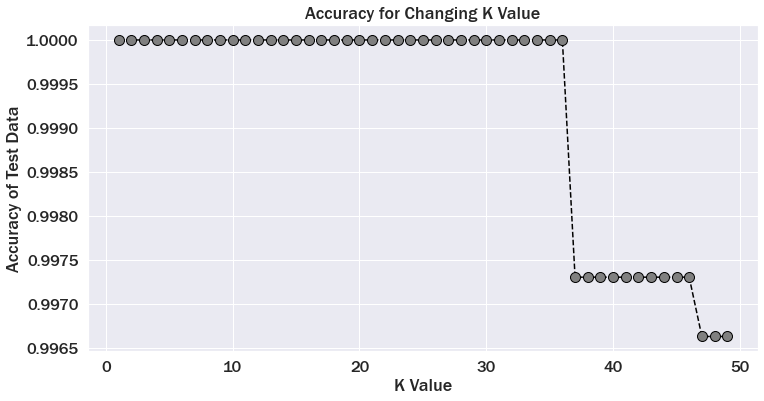

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50)
         , accuracy_KNN
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Accuracy for Changing K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy of Test Data')
plt.show()

From the above graph we see that any K value below 36 is able to record an accuracy of 1, so we choose 10. Considering that a very large K value could result in overfitting, it should be avoided to use 36.

In [40]:
KNN = KNeighborsClassifier(n_neighbors=10) 
results_KNN = run_model(KNN, mushrooms, columns)

In [41]:
save_results(results_KNN,experiments,'KNN')

In [42]:
experiments

,model,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,SVM,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
1,RF,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
2,KNN,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"


KNN is able to record perfect scores as well. 

### d) Decision Trees

In [43]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [3, 5, 7, 10],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'recall')

In [44]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='recall', verbose=1)

In [45]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [46]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
results_DT = run_model(dt, mushrooms, columns)

In [47]:
save_results(results_DT,experiments,'DT')

In [48]:
experiments

,model,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,SVM,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
1,RF,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
2,KNN,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
3,DT,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"


## (3) Feature Reduction

From looking at the dataframe containing all the results above, we can see that all models were able to achieve perfect scores. Now the next focus is to try and minimize the required features to be included to achieve these results. This is done mainly for practical reasons since at the moment the model uses 83 features, which is an unreasonable number of variables that someone would have to check to determine whether a mushroom is poisonous or not. To accomplish this we will use the DT model since it is a faster model compared to the other 3 and run the permutation_importance function to compare the importance between all features. 

In [49]:
#the DT model must be fitted first so that we can use permutation_importance function
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
results_DT = run_model(dt, mushrooms, columns)

r = permutation_importance(dt, X_train, y_train, n_repeats=50, random_state=0)
permutation = pd.DataFrame(columns=['Average_Importance'], index=list(X_train.columns))
permutation['Average_Importance'] = r.importances_mean

Once the average importance value is recorded for each feature, we need to choose only features of an importance of greater than 1, as these are the only features that impact the model, while the rest are redundant. As we can see in the dataframe below, there are only 6 significant features, with the most important being no odor!  

In [50]:
perm_new = permutation[permutation['Average_Importance']>0].reset_index().sort_values('Average_Importance', ascending = False)
perm_new.rename(columns={'index':'Features'},inplace = True)

In [51]:
perm_new

,Features,Average_Importance
2,odor_n,0.446260
3,stalk_root_c,0.035858
1,odor_l,0.028773
0,odor_a,0.028207
4,stalk_surface_below_ring_y,0.026597


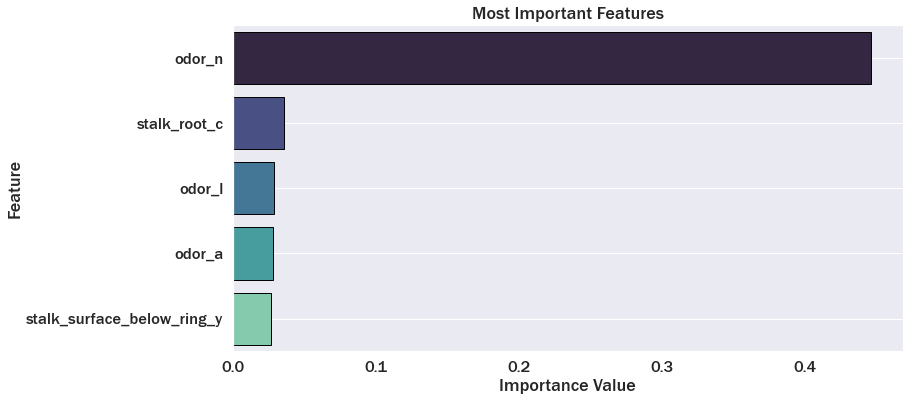

In [52]:
plt.figure(figsize=(12,6))
pl=sns.barplot(data = perm_new, x='Average_Importance', y='Features', orient = 'h' ,palette='mako', linewidth=1, edgecolor=".01")
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Most Important Features')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.grid()
plt.show()

The above barchart summarises the relation between the most important features. Knowing that these are the features needed to achieve best results, we can try running the DT model, with decreasing number of features in order of priority to find what is the minimum number of features required to achieve perfect results. The statistics are going to be saved in the `dt_important_features` dataframe.  

In [53]:
dt_important_features = pd.DataFrame(columns=['Number of Features',('train_a','test_a'),('train_r','test_r'),('train_p','test_p'),('train_f1','test_f1')])

In [54]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
results_DT = run_model(dt, mushrooms, columns)
save_results(results_DT,dt_important_features,'All')

In [55]:
columns_imp = list(perm_new['Features'])
for c in range(0,len(columns_imp)):
    dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
    results_DT = run_model(dt, mushrooms, columns_imp[0:len(columns_imp)-c],after_OHE = True)
    save_results(results_DT,dt_important_features,f'{len(columns_imp)-c}')

In [56]:
dt_important_features

,Number of Features,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,All,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
1,5,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
2,4,"(0.9976427007913791, 0.9986531986531987)","(0.9953657729228732, 0.9973509933774835)","(1.0, 1.0)","(0.997677504976775, 0.9986737400530504)"
3,3,"(0.9828253914800471, 0.9771043771043771)","(0.9953657729228732, 0.9973509933774835)","(0.9715670436187399, 0.9592356687898089)","(0.9833224329627207, 0.9779220779220781)"
4,2,"(0.9669978110793063, 0.9595959595959596)","(0.9953657729228732, 0.9973509933774835)","(0.9429288178112261, 0.9284833538840938)","(0.9684380032206118, 0.9616858237547893)"
5,1,"(0.8957736992759724, 0.8996632996632996)","(0.9953657729228732, 0.9973509933774835)","(0.8325027685492802, 0.8366666666666667)","(0.90667872757425, 0.9099697885196374)"


Perfect scores can be achieved with 5 features which is a reasonable number to use.

In [57]:
final_columns = columns_imp[0:len(columns_imp)]
results_DT = run_model(dt, mushrooms, final_columns, after_OHE = True)
save_results(results_DT,experiments,'DT - 5 features')

Our best models can be summarised in the following dataframe.

In [58]:
experiments

,model,"(train_a, test_a)","(train_r, test_r)","(train_p, test_p)","(train_f1, test_f1)"
0,SVM,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
1,RF,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
2,KNN,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
3,DT,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"
4,DT - 5 features,"(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)","(1.0, 1.0)"


Taking everything into consideration the best results can be achieved using 

`run_model(dt, mushrooms, final_columns, after_OHE = True)`

where final columns includes the following 5 features.

In [59]:
final_columns

['odor_n', 'stalk_root_c', 'odor_l', 'odor_a', 'stalk_surface_below_ring_y']

The performance of our model can be visualised below using a confusion matrix that clearly indicates that there are 0 False Negative predictions, and the ROC curve which has an area of exactly 1 indicating that the model is perfect.

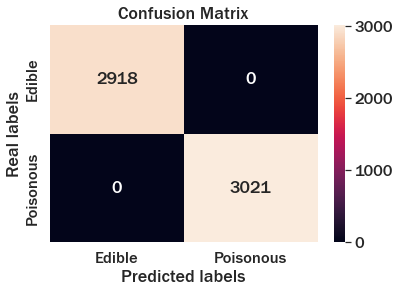

In [60]:
results_DT = run_model(dt, mushrooms, final_columns, after_OHE = True)
produce_confusion(results_DT[0],results_DT[1],'Edible','Poisonous')

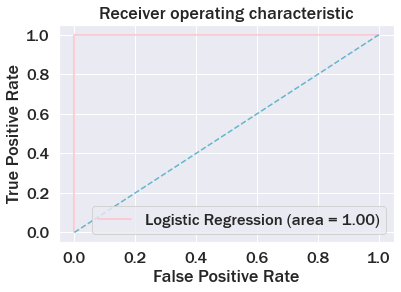

In [61]:
logit_roc_auc = roc_auc_score(results_DT[0], results_DT[1])
fpr, tpr, thresholds = roc_curve(results_DT[0], results_DT[1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color='pink')
plt.plot([0, 1], [0, 1],'c--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## (4) Productionising

Using this perfect model we have achieved our goal of making a model that accurately predicts whether a mushroom is poisonous or not and we have managed to do that using only 5 features. The final step is to make a user-friendly function that will give this prediction. 

In [62]:
#saving the resulting model
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
results_DT = run_model(dt, mushrooms, final_columns, after_OHE = True)
final_model = results_DT[4]

In [63]:
def mushroom_check():
    
    #first create a dataframe that contains the mushroom features
    features = pd.DataFrame(columns=final_columns)
    features.loc[len(features)] = 0
    
    odor = input('What is the odor of the mushroom? (Available options are none, l_anise, almond, unknown) ' )
    odor = odor.lower()
    if odor in ['none','l_anise','almond']:
        features['odor'+'_'+odor[0]] = 1
    elif odor == 'unknown':
        pass
    else:
        return 'Please write only one of the available options'
    
    stalk_surface_below_ring = input('How is the stalk surface below the ring of the mushroom? (Available options are y_scaly or unknown) ' )
    if stalk_surface_below_ring not in ['y_scaly','unknown']:
        return 'Please write only one of the available options'
    if stalk_surface_below_ring == 'y_scaly':
        features['stalk_surface_below_ring'+'_'+stalk_surface_below_ring[0]] = 1    
    
    stalk_root = input('What is the stalk root of the mushroom? (Available options are club or unknown) ' )
    if stalk_root not in ['club','unknown']:
        return 'Please write only one of the available options'
    if stalk_root == 'club':
        features['stalk_root'+'_'+stalk_root[0]] = 1 
    
    prediction = final_model.predict(features)
    
    if prediction[0] == 0:
        return 'This is safe to eat'
    else:
        return 'This is poisonous!!'

We can now check the final function by using 2 known test cases and comparing the result. We can review the train data to check some examples.

In [64]:
vis = run_model(dt, mushrooms, final_columns, premodel = True, after_OHE = True)
pd.concat([vis[0],vis[2]],axis=1).head(5)

,odor_n,stalk_root_c,odor_l,odor_a,stalk_surface_below_ring_y,class
5739,0,0,0,0,0,1
3607,0,0,0,0,0,1
6033,0,0,0,0,0,1
3849,1,0,0,0,0,0
451,0,1,1,0,0,0


In [65]:
mushroom_check()

What is the odor of the mushroom? (Available options are none, l_anise, almond, unknown) unknown
How is the stalk surface below the ring of the mushroom? (Available options are y_scaly or unknown) unknown
What is the stalk root of the mushroom? (Available options are club or unknown) unknown


'This is poisonous!!'

In [66]:
mushroom_check()

What is the odor of the mushroom? (Available options are none, l_anise, almond, unknown) none
How is the stalk surface below the ring of the mushroom? (Available options are y_scaly or unknown) unknown
What is the stalk root of the mushroom? (Available options are club or unknown) unknown


'This is safe to eat'

Our final function works as expected by answering only 3 simple questions! So next time you go out in the wild, make sure to take with you a Notebook supporting device cause it might be a matter of life or death...